# Notebook 7: Discrete Random Variables and Distributions 
***

In this notebook we'll get some more practice with discrete random variables and see how we can play with binomial distributions using Python.   

We'll need Numpy and Matplotlib for this notebook, so let's load them.  We'll also need SciPy's binom function for computing binomial coefficients.  

In [1]:
import numpy as np 
import matplotlib.pylab as plt 
from scipy.special import binom
%matplotlib inline

### Exercise 1 - Loaded Dice 
*** 

Consider a loaded six-sided die.  

**Part A**: Suppose that the die is loaded such that you are twice as likely to roll either a $1$, $2$, or $3$, than you are to roll either a $4$, $5$, or $6$. Let $X$ be a random variable describing the die.  What is the probability mass function for $X$? 

**Solution**:

Let's write down the relationship between the probabilities of each of the values of $X$.  We have 

$$
p(1) = p(2) = p(3) = 2p(4) = 2p(5) = 2p(6)
$$

Next we write down the condition that the probabilities must sum to 1.  We have 

$$
1 = p(1) + p(2) + p(3) + p(4) + p(5) + p(6) 
$$

Writing each probability in terms of $p(1)$ from the first set of equations, we have 

$$
1 = p(1) + p(1) + p(1) + \frac{1}{2}p(1) + \frac{1}{2}p(1) + \frac{1}{2}p(1) = \frac{9}{2}p(1)
$$

Solving for $p(1)$ we have 

$$
p(1) = \frac{2}{9}
$$

Plugging this into the relationships with $p(1)$, we have 

$$\begin{array}{c|ccccc}
a & 1 & 2 & 3 & 4 & 5 & 6 \\
\hline
p(a) & \frac{2}{9} & \frac{2}{9} & \frac{2}{9} & \frac{1}{9} & \frac{1}{9} & \frac{1}{9} \\
\end{array}$$

**Part B**: Find the cumulative distribution function for $X$.  What is the probability that you roll a $4$ or lower with the loaded die? 

**Solution**: 

The cumulative distribution function is 

$$\begin{array}{c|ccccc}
a & 1 & 2 & 3 & 4 & 5 & 6 \\
\hline
F(a) & \frac{2}{9} & \frac{4}{9} & \frac{6}{9} & \frac{7}{9} & \frac{8}{9} & 1 \\
\end{array}$$

The probability that we roll a 4 or lower is then 

$$
F(4) = P(X \leq 4) = \frac{7}{9}
$$

**Warm-up for Exercise 2**
Consider the experiment of flipping a bias coin 4 times. $P(H) = 0.75$ and $P(T) = 0.25$
What is the probability mass function? Consider tails to be 'success'.

ANS:

$\binom40(.25)^0(.75)^4 = \frac{81}{256} \approx .316\phantom{xxxx}$   The probability of 0 Tails out of 4 flips.

$\binom41(.25)^1(.75)^3 = \frac{108}{256} \approx .422\phantom{xxxx}$  The probability of 1 Tail out of 4 flips.

$\binom42(.25)^2(.75)^2 = \frac{54}{256} \approx .211\phantom{xxxx}$  The probability of 2 Tails out of 4 flips.

$\binom43(.25)^3(.75)^1 = \frac{12}{256} \approx .047\phantom{xxxx}$  The probability of 3 Tails out of 4 flips.

$\binom44(.25)^4(.75)^0 = \frac{1}{256} \approx .004\phantom{xxxx}$  The probability of 4 Tails out of 4 flips.

The PMF
$\begin{array}{c|ccccc}
a & 0 & 1 & 2 & 3 & 4 \\
\hline
f(a) & \frac{81}{256} & \frac{108}{256} & \frac{54}{256} & \frac{12}{256} & \frac{1}{256} \\
\end{array}$

The CDF
$\begin{array}{c|ccccc}
a & 0 & 1 & 2 & 3 & 4 \\
\hline
F(a) & \frac{81}{256} & \frac{189}{256} & \frac{243}{256} & \frac{255}{256} & \frac{256}{256} \\
\end{array}$

### Exercise 2 - Implementing and Sampling the Binomial Distribution 
***

**Part A**: Write a $\color{red}{\text{function}}$ that takes in the parameters of the binomial distribution, $n$ and $p$, and $\color{red}{\text{returns the probability mass function}}$ as a Numpy array. In order to get the coefficient in the binomial distribution, you'll need a way to compute ${n \choose k}$.  You can do this from scratch using Python's factorial function, or you can get the value directly using Scipy's canned function [binom](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.special.binom.html).  

In [2]:
def binomial_pmf(n, p):
    pmf = np.array([binom(n,k)*(p**k)*((1-p)**(n-k)) for k in range(n+1)])
    return pmf

pmf = binomial_pmf(10, 0.5)

# `enumerate` is a pre-made python function.
# documentation, https://www.geeksforgeeks.org/enumerate-in-python/
# documentation, https://docs.python.org/3/library/functions.html#enumerate

for k, prob in enumerate(pmf):
    print("{} | {:0.4f}".format(k, prob))
    
# Here is a check that your binomial_pmf function at least sums to 1
assert np.sum(pmf)==1, "Error: pmf does not add up to 1"

0 | 0.0010
1 | 0.0098
2 | 0.0439
3 | 0.1172
4 | 0.2051
5 | 0.2461
6 | 0.2051
7 | 0.1172
8 | 0.0439
9 | 0.0098
10 | 0.0010


For instance $\binom{10}{1}(\frac{1}{2})\cdot(\frac{1}{2})^9 = \frac{5}{512}\approx .009766$ as seen in row '1'.

In Python, a $\color{red}{\text{for loop}}$ is usually written as a loop over an iterable object. This means you $\color{blue}{\text{don’t need}}$ a counting variable to access items in the iterable. Sometimes, though, $\color{blue}{\text{you do want}}$ to have a variable that changes on each loop iteration. Rather than creating and incrementing a variable yourself, you can use Python’s `enumerate()` to get a counter and the value from the iterable at the same time!

In [3]:
np.sum(binomial_pmf(10, 0.5)[7:9])
# This sums the previous pmf values from indices 7 and 8.
# Just an idea to check values, i.e. the CDF

0.1611328125

In [4]:
binom(10,8)
# just verifying the `binom` function

45.0

**Part B**: So now you know the exact distribution of a binomial random variable, but very frequently we'll want to generate samples from that distribution.  You can do that with Numpy's [binomial](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.binomial.html) function. Read the documentation, and then try drawing 20 samples from _Bin(n,p)_ for $n=10$ and $p=0.25$. 

Concretely, think of flipping a bias coin 10 times. You want to know how many successes (Tails) you would get in 10 flips with P(H) = .75 and P(T) = .25. Therefore, you $\color{red}{\text{sample}}$ (20 times) a distribution with these characteristics; _Bin(10, .25)_.

In [5]:
x = np.random.binomial(n=10, p=0.25, size=20)
print(x)

[2 3 4 1 3 4 2 3 3 3 1 2 4 4 2 2 6 5 6 4]


**Part C**: We can approximate the pmf of _Bin(n,p)_ by drawing $\color{red}{\text{many many}}$ samples from the distribution and plotting a **density** $\color{blue}{\text{histogram}}$.  Do this now.  Additionally, use the function you wrote in **Part A** to get the $\color{blue}{\text{exact density}}$, and plot the distribution directly below the histogram of your sampled distribution.  How do they compare?  What happens if you use more or fewer samples in the histogram? 

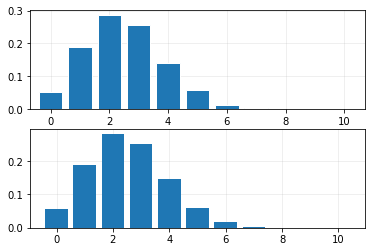

In [6]:
n = 10
p = 0.25

sample = np.random.binomial(n=n, p=p, size=10000)
  # A sample from which to build our histogram estimate
bins = np.arange(-0.5, 11.5, 1)

X = np.array(range(n+1))
pmf = binomial_pmf(n=10, p=0.25)
  # The exact density distribution

fig, ax = plt.subplots(nrows=2, ncols=1)
  # initialize the graph

# ax[0] is the estimate of the pmf from the sample
ax[0].hist(sample, edgecolor='white', density=True, bins=bins, rwidth=0.8)
ax[0].set_axisbelow(True)
ax[0].grid(alpha=0.25)
ax[0].set_xlim([-0.7, 10.7]);

# ax[1] is the actual pmf
ax[1].bar(X, pmf)
ax[1].set_axisbelow(True)
ax[1].grid(alpha=0.25);

### Exercise 3 - Predicting Play-off Winners 
***

In this exercise we'll look at the probability of your favorite sports team winning a best-of-7 play-off series. Suppose your team is the slight favorite in the series and in each individual game has a probability of winning of $p = 0.55$. 

**Part A**: What is the probability that your team wins the series? 

**Solution:**

Could win on 4th game, 5th game, 6th game or 7th game

Winning in the 4th game:  ${4 \choose 4}\cdot p^4$

Have to $\color{red}{\text{win the last game}}$, so out of the 4 previous games, choose 3 for team to win:

Winning in the 5th game:  ${4 \choose 3}\cdot p^3 \cdot (1-p) \cdot \color{red}{p}$

Have to $\color{red}{\text{win the last game}}$, so out of the 5 previous games, choose 3 for team to win:

Winning in the 6th game: ${5 \choose 3}\cdot p^3 \cdot (1-p)^2 \cdot \color{red}{p}$

Have to $\color{red}{\text{win the last game}}$, so out of the 6 previous games, choose 3 for team to win:

Winning in the 7th game: ${6 \choose 3} \cdot p^3 \cdot (1-p)^3 \cdot \color{red}{p}$

In [11]:
p = 0.55
# prob_win is the probability of winning in 4 games, plus the
#  probability of winning in 5 games, plus the probability of
#  winning in 6 games, plus the probability of winning in 7 games.
# So the variable 'prob_win' is manually summing all the 
#  appropriate binomial calculations from above (by hand).
prob_win = binom(4,4)*(p**4) + binom(4,3)*(p**4)*(1-p) + \
           binom(5,3)*(p**4)*((1-p)**2) + binom(6,3)*(p**4)*((1-p)**3)

print("Theoretically calculated solution for 7-game series at 0.55:")
print('probability of winning best-of-7: {:.3f}'.format(prob_win))
print("")


Theoretically calculated solution for 7-game series at 0.55:
probability of winning best-of-7: 0.608



In [19]:
# Lets do the same thing with functions which are
#  made to find the answer for any length of series besides
#  a 7-game series, and for any probability, besides 0.55.

def p_binom(n, k, p):
    return binom(n,k)*(p**k)*((1-p)**(n-k))
# This function returns a particular binomial calculation for n,k,p.

#def prob_win_series(series_length=7, p=0.5):
#    wins_req = series_length//2 + 1 
#    prob = p*np.sum([p_binom(n,wins_req-1,p) for n in range(wins_req-1,series_length)])
#    return prob

def prob_win_series(series_length=7, p_win=0.5):
    wins_req = series_length//2 + 1
    # this is the number of wins required to win the series of
    #  length named in the arguments.
    prob = p_win*np.sum([p_binom(n, wins_req-1, p_win) for n in range(wins_req-1, series_length)])
    # 'prob' is the probability of winning the series of
    #  the name length with the named probability of winning a 
    #   given game.
    return prob

s=7
p=0.55
prob_win = prob_win_series(s, p)

print("Theoretically calculated solution for {:}-game series at {:.2}: ".format(s,p))
print('probability of winning best-of-{:}: {:.3f}'.format(s,prob_win))

Theoretically calculated solution for 7-game series at 0.55: 
probability of winning best-of-7: 0.608


**Part B**: How often will an underdog with a winning probability of 45% win a best-of-7 series?  Is this underdog more likely to win a series if it's shorter, say best-of-5 or best-of-3? 

In [8]:
print(prob_win_series(3, 0.45))
print(prob_win_series(5, 0.45))
print(prob_win_series(7, 0.45))
print(prob_win_series(9, 0.45))

0.42525
0.4068731250000001
0.3917122031250001
0.37857905455078134


This example is not particularly realistic because it does not consider home-field advantage.  Typically teams will play better (and thus have a higher probability of winning) when they play at their home field.  Suppose that your team hosts Games 1, 2, 6, and 7 at home, and plays away in Games 3, 4, and 5.  Suppose that when your team plays at home, they win with probability $p = 0.6$ and when they're on the road they win with only probability $q=0.5$.  

**Part C**: Is the probability that your team wins $k$ of the $n$ games still well-described by a binomial distribution?  Why or why not?  You might consider reading [this article](https://fivethirtyeight.com/features/why-cant-the-rockies-hit-outside-the-rockies/) for some inspiration, especially if you are a Rockies fan!

**Solution:**

Not really, because the probability of winning varies from location to location, depending on whether your team is playing at home or away.  There are also probably environmental factors that come into play.  For example, it is rumored that the thinner air in Denver makes it a tougher baseball park to pitch in, and an easier park to hit home runs in.

Parts D & E are $\color{red}{\text{optional}}$. If you are interested in a more serious determination of winning a series, then try out parts D and E below. These concepts will not be assessed.

**Part D**: What is the probability that your team wins the 7-game series under the above (above part C) conditions?

The best way to tackle this problem is probably to work out a few smaller probabilities by hand, and then write some code to calculate the probabilities in general.  Also, you may find the `itertools` package useful, specifically the [`itertools.combinations` method](https://docs.python.org/3/library/itertools.html#itertools.combinations).

**Solution:**

**Win on 4th game:**

$P(4) = p^2 \cdot q^2$

**Win on the 5th game:**

$P(5) = q \times$ probability of winning 3 out of the first 4 games

In [9]:
import itertools

def prob_win_on_game_k(n, k, p, q, loc_probs):
    games_to_win = n//2 + 1
    cum_prob = 0
    for combo in itertools.combinations(range(k-1), games_to_win-1):
        win_indices = list(combo) + [k-1]
        win_probs = [loc_probs[ii] for ii in win_indices]
        loss_indices = list(set(range(k))-set(win_indices))
        loss_probs = [1-loc_probs[ii] for ii in loss_indices]
        cum_prob += np.prod(win_probs+loss_probs)
    return cum_prob 

p, q = 0.6, 0.5
loc_probs = np.array([p, p, q, q, q, p, p])
prob_win = np.sum([prob_win_on_game_k(n, k, p, q, loc_probs) for k in range(4,8)])
print("P(Win Best-of-7 Homefield) = {:.3f}".format(prob_win))

P(Win Best-of-7 Homefield) = 0.108


**Part E**: Now suppose that the teams are evenly matched in the sense that your team wins with probability $p=0.55$ when playing at home and wins with only probability $q = (1-p) = 0.45$ when playing away.  How much of a difference does home-field advantage make? 

In [10]:
# Solution:

p, q = 0.55, 0.45
loc_probs = np.array([p, p, q, q, q, p, p])
prob_win = np.sum([prob_win_on_game_k(n, k, p, q, loc_probs) for k in range(4,8)])
print("P(Win Best-of-7 Homefield) = {:.3f}".format(prob_win))

P(Win Best-of-7 Homefield) = 0.066


If the teams are relatively evenly matched, which team starts at home/away does not appear to make much of a difference.  That's good!